In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import datetime as dt
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-dataset/ipl.csv


In [2]:
df=pd.read_csv('/kaggle/input/ipl-dataset/ipl.csv')

In [3]:
df.shape

(76014, 15)

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


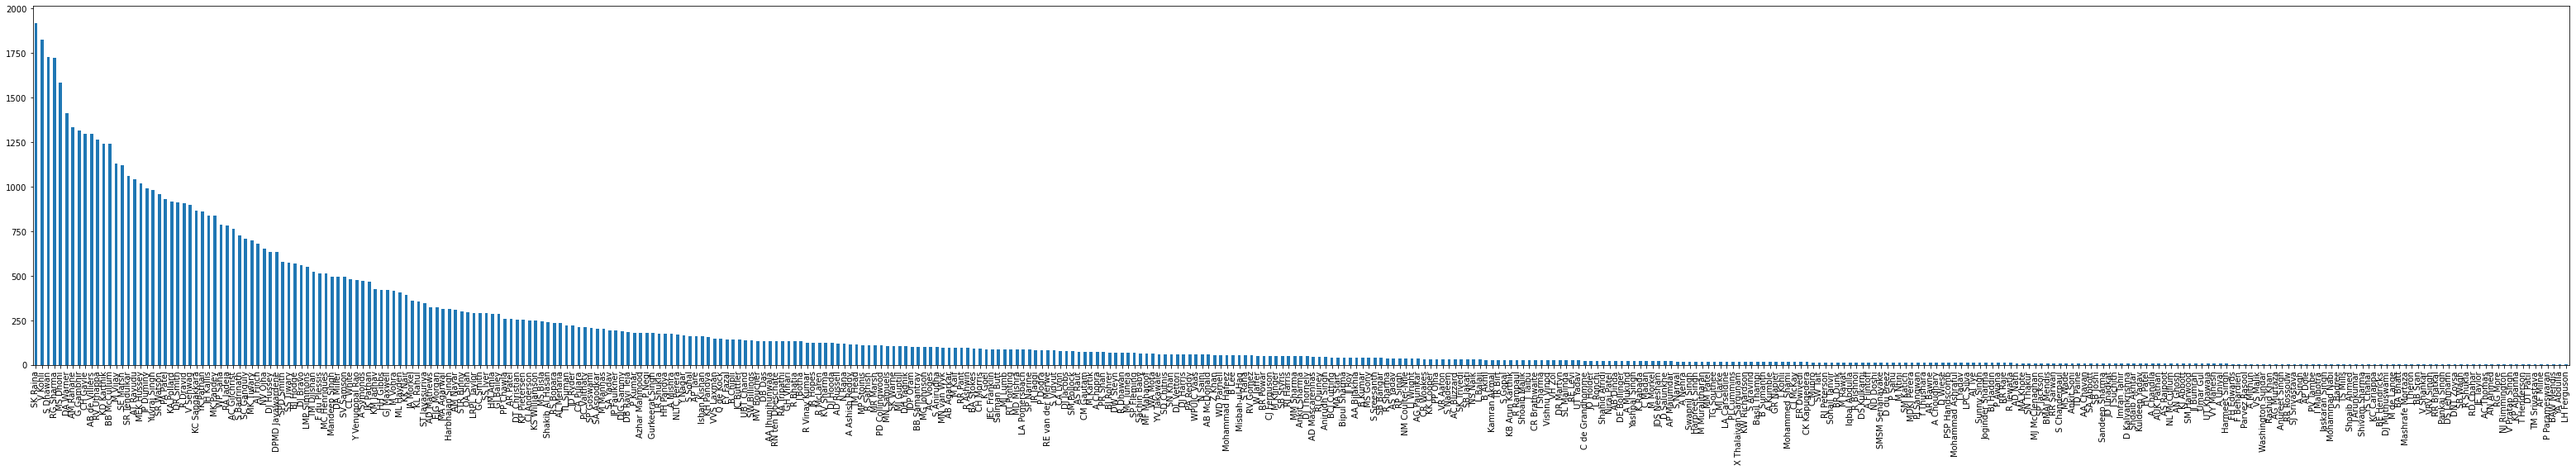

In [5]:
plt.figure(figsize=(55,8))
df['batsman'].value_counts().plot(kind='bar')

In [6]:
batsman_rating=df['batsman'].value_counts().to_dict()
df['batsman_rating']=df['batsman'].map(batsman_rating)

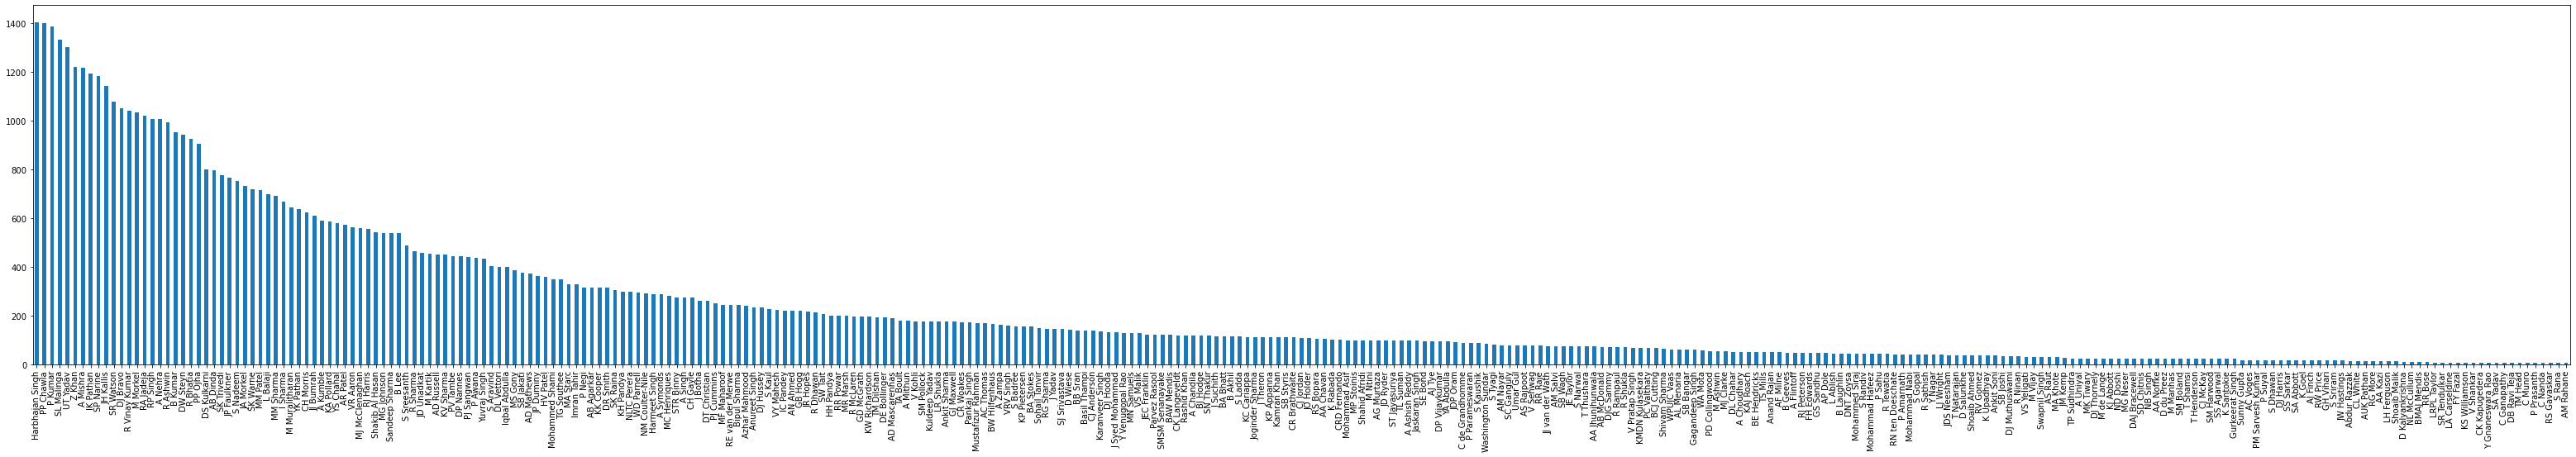

In [7]:
plt.figure(figsize=(55,8))
df['bowler'].value_counts().plot(kind='bar')

In [8]:
bowler_rating=df['bowler'].value_counts().to_dict()
df['bowler_rating']=df['bowler'].map(bowler_rating)

In [9]:
df['date']=df['date'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d'))

In [10]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,batsman_rating,bowler_rating
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222,706,1386
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222,1242,1386
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222,1242,1386
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222,1242,1386
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222,1242,1386


In [11]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [12]:
consitent_teams=['Kolkata Knight Riders','Chennai Super Kings','Rajasthan Royals','Mumbai Indians','Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils','Sunrisers Hyderabad']

In [13]:
df=df[df['bat_team'].isin(consitent_teams) & df['bowl_team'].isin(consitent_teams)]

In [14]:
df=pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [15]:
df.head()

,mid,date,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,1,2008-04-18,M Chinnaswamy Stadium,SC Ganguly,P Kumar,1,0,0.1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2008-04-18,M Chinnaswamy Stadium,BB McCullum,P Kumar,1,0,0.2,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2008-04-18,M Chinnaswamy Stadium,BB McCullum,P Kumar,2,0,0.2,2,0,...,0,0,0,0,0,0,0,0,1,0
3,1,2008-04-18,M Chinnaswamy Stadium,BB McCullum,P Kumar,2,0,0.3,2,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2008-04-18,M Chinnaswamy Stadium,BB McCullum,P Kumar,2,0,0.4,2,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
df=df[df['overs']>=5.0]

In [17]:
df.head()

,mid,date,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,1,2008-04-18,M Chinnaswamy Stadium,BB McCullum,Z Khan,61,0,5.1,59,0,...,0,0,0,0,0,0,0,0,1,0
33,1,2008-04-18,M Chinnaswamy Stadium,SC Ganguly,Z Khan,61,1,5.2,59,1,...,0,0,0,0,0,0,0,0,1,0
34,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.3,59,1,...,0,0,0,0,0,0,0,0,1,0
35,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.4,59,1,...,0,0,0,0,0,0,0,0,1,0
36,1,2008-04-18,M Chinnaswamy Stadium,RT Ponting,Z Khan,61,1,5.5,58,1,...,0,0,0,0,0,0,0,0,1,0


In [18]:
stadium=df['venue'].value_counts().to_dict()
stadium

{'Eden Gardens': 4497,
 'M Chinnaswamy Stadium': 4406,
 'Feroz Shah Kotla': 4265,
 'Wankhede Stadium': 4259,
 'MA Chidambaram Stadium, Chepauk': 3734,
 'Punjab Cricket Association Stadium, Mohali': 2710,
 'Sawai Mansingh Stadium': 2516,
 'Rajiv Gandhi International Stadium, Uppal': 2221,
 'Sardar Patel Stadium, Motera': 1016,
 'Kingsmead': 1012,
 'Brabourne Stadium': 933,
 'Punjab Cricket Association IS Bindra Stadium, Mohali': 727,
 'SuperSport Park': 657,
 'Dubai International Cricket Stadium': 649,
 'Himachal Pradesh Cricket Association Stadium': 646,
 'Sheikh Zayed Stadium': 611,
 'Sharjah Cricket Stadium': 559,
 "St George's Park": 551,
 'JSCA International Stadium Complex': 534,
 'New Wanderers Stadium': 463,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 462,
 'Shaheed Veer Narayan Singh International Stadium': 459,
 'Dr DY Patil Sports Academy': 446,
 'Maharashtra Cricket Association Stadium': 379,
 'Newlands': 374,
 'Barabati Stadium': 274,
 'Holkar Cricket Stadium': 

In [19]:
df['venue']=df['venue'].map(stadium)

In [20]:
df['date'].dt.year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [21]:
df['date'].dt.year.value_counts()

2013    5476
2014    5403
2015    4989
2012    4131
2010    4099
2008    3814
2009    3524
2011    3028
2016    2866
2017    2778
Name: date, dtype: int64

In [22]:
X=df.drop(['total','mid','date','striker','non-striker','batsman','bowler','batsman_rating','bowler_rating'],axis=1)
y=df['total']

In [23]:
X.head()

,venue,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,4406,61,0,5.1,59,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
33,4406,61,1,5.2,59,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
34,4406,61,1,5.3,59,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
35,4406,61,1,5.4,59,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
36,4406,61,1,5.5,58,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


# Multicollinearity

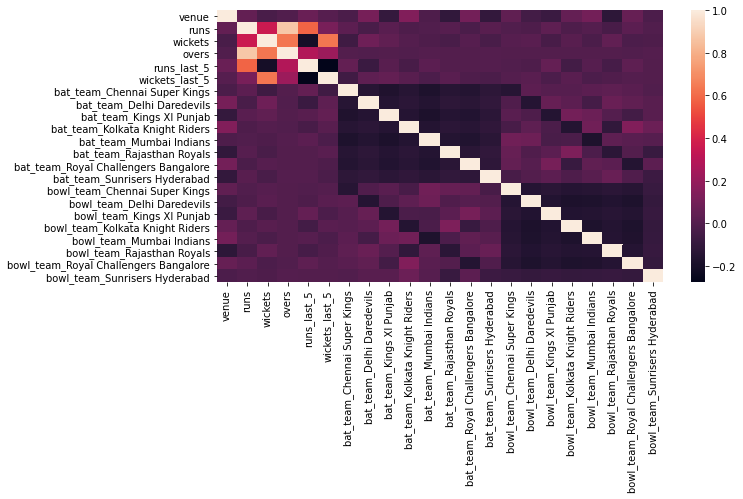

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr())
plt.show()

In [25]:
X_train=X[df['date'].dt.year<=2016]
X_test=X[df['date'].dt.year>=2017]

In [26]:
y_train=y[df['date'].dt.year<=2016]
y_test=y[df['date'].dt.year>=2017]

In [27]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(37330, 22) (37330,)
(2778, 22) (2778,)


In [28]:
model=LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=model.predict(X_test)

In [31]:
result=sm.OLS(y,X).fit()

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     3908.
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:12:57   Log-Likelihood:            -1.7141e+05
No. Observations:               40108   AIC:                         3.429e+05
Df Residuals:                   40087   BIC:                         3.430e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
venue                                     0.0008   5.87e-05     14.342      0.000       0.001       0.001
runs                                      0.9596      0.007    127.962      0.000       0.945       0.974
wickets                                  -4.9467      0.097    -50.978      0.000      -5.137      -4.756
overs                                    -6.3371      0.074    -86.081      0.000      -6.481      -6.193
runs_last_5                              -0.0212      0.012     -1.712      0.087      -0.045       0.003
wickets_last_5                           -1.2125      0.121     -9.985      0.000      -1.450      -0.974
bat_team_Chennai Super Kings             82.9481      0.348    238.024      0.000      82.265      83.631
bat_team_Delhi Daredevils                78.8146      0.366    215.248      0.000      78.097      79.532
bat_team_Kings XI Punjab                 83.4895      0.342    243.984      0.000      82.819      84.160
bat_team_Kolkata Knight Riders           78.2279      0.373    209.848      0.000      77.497      78.959
bat_team_Mumbai Indians                  84.5452      0.353    239.560      0.000      83.853      85.237
bat_team_Rajasthan Royals                78.5885      0.365    215.441      0.000      77.873      79.303
bat_team_Royal Challengers Bangalore     84.8075      0.375    226.361      0.000      84.073      85.542
bat_team_Sunrisers Hyderabad             83.4143      0.382    218.323      0.000      82.665      84.163
bowl_team_Chennai Super Kings            81.8040      0.370    221.109      0.000      81.079      82.529
bowl_team_Delhi Daredevils               82.9786      0.343    242.078      0.000      82.307      83.650
bowl_team_Kings XI Punjab                84.0059      0.353    237.827      0.000      83.314      84.698
bowl_team_Kolkata Knight Riders          78.2152      0.351    223.125      0.000      77.528      78.902
bowl_team_Mumbai Indians                 81.5243      0.356    228.683      0.000      80.826      82.223
bowl_team_Rajasthan Royals               82.5499      0.356    231.859      0.000      81.852      83.248
bowl_team_Royal Challengers Bangalore    82.3040      0.353    233.178      0.000      81.612      82.996
bowl_team_Sunrisers Hyderabad            81.4535      0.454    179.600      0.000      80.565      82.342
==============================================================================
Omnibus:                     1958.549   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6522.329
Skew:                          -0.152   Prob(JB):                         0.00
Kurtosis:                       4.952   Cond. No.                     1.88e+19
======================================